In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lhs712-w23-activity-tweeting/WN23_PA_test_tweets.txt
/kaggle/input/wn23-data/WN23_sample_output.txt
/kaggle/input/wn23-data/WN23_PA_training_labels.txt
/kaggle/input/wn23-data/WN23_PA_test_tweets.txt
/kaggle/input/wn23-data/WN23_PA_training_tweets.txt


In [2]:
import pandas as pd
df1 = pd.read_csv('/kaggle/input/wn23-data/WN23_PA_training_tweets.txt', delimiter=',', encoding='iso-8859-1')
df2 = pd.read_csv('/kaggle/input/wn23-data/WN23_PA_training_labels.txt', delimiter=',', encoding='iso-8859-1')


train_df = pd.merge(df1, df2, on='TweetID')
test_df = pd.read_csv('/kaggle/input/wn23-data/WN23_PA_test_tweets.txt', delimiter=',', encoding='iso-8859-1')

In [3]:
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [4]:
train_df.Tweet = train_df.Tweet.apply(lambda x: process_tweet(x))

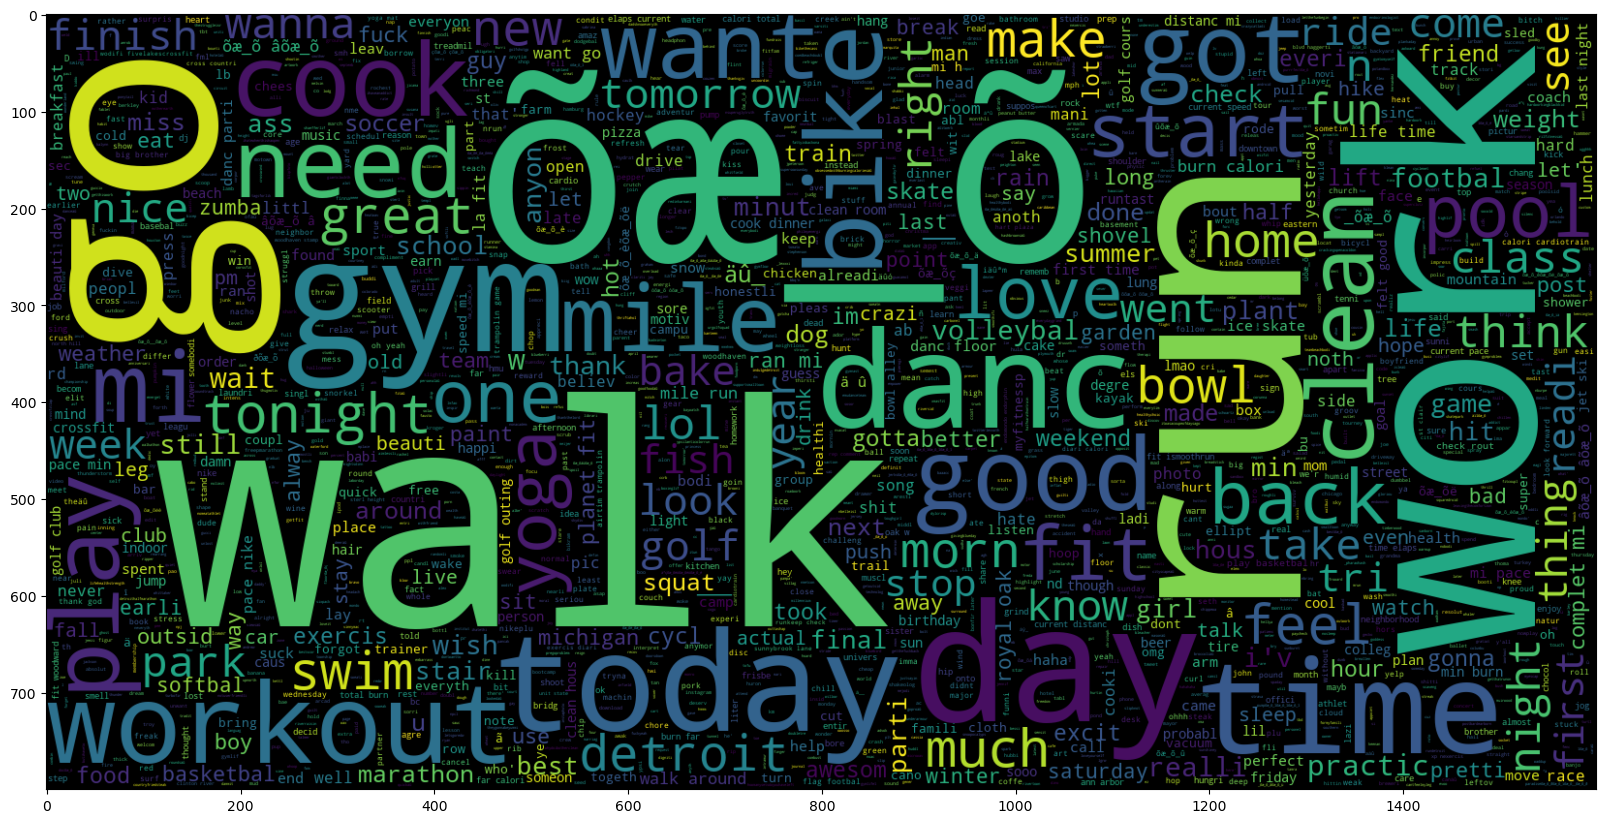

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tweets = train_df[train_df.Label == 1].Tweet
text = ""
for tweet in tweets:
    text += " ".join(tweet) + " "

wc = WordCloud(max_words=2000, width=1600, height=800).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')

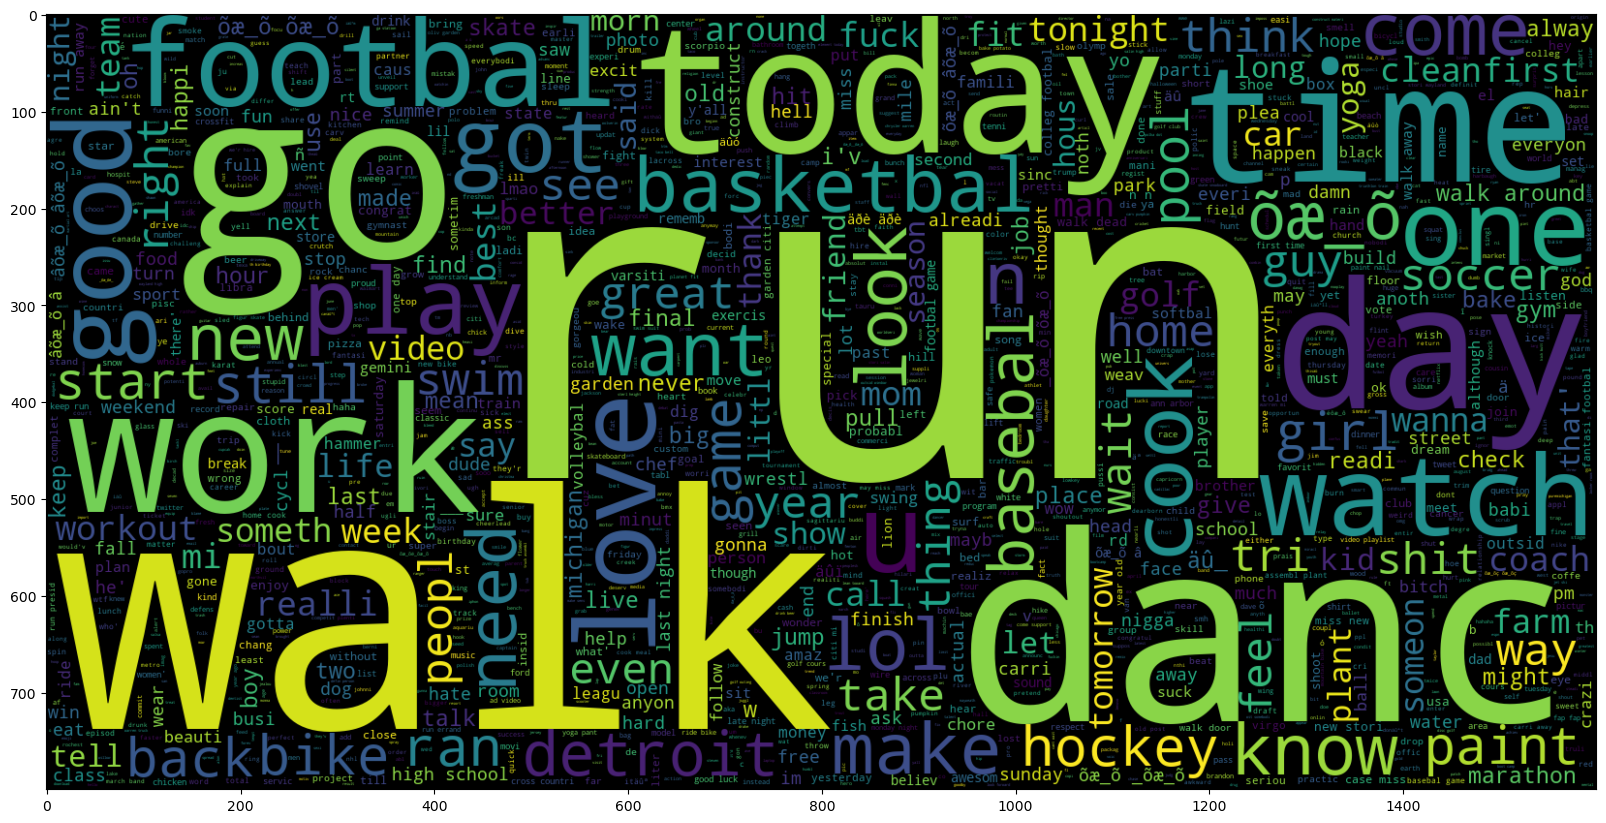

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tweets = train_df[train_df.Label == 0].Tweet
text = ""
for tweet in tweets:
    text += " ".join(tweet) + " "

wc = WordCloud(max_words=2000, width=1600, height=800).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')

In [7]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 3200
Test Data size 800


In [9]:
train_data.head(10)

,TweetID,TimeOfDay,Tweet,Label
1684,2685,22,"[michigan, peac, wood, upnorth, beauti, cedar,...",1
2650,3651,9,"[great, time, st, joseph, last, week, camp, hi...",1
3605,4606,18,[swim],0
3458,4459,18,"[hey, friend, look, decent, entri, track, bike...",0
2460,3461,12,"[game, day, colleg, footbal, mani, friend, pre...",1
619,1620,16,"[execut, chef, upscal, fine, dine, resta, ...,...",0
3634,4635,0,"[complet, mi, bike, plu, hiit]",1
801,1802,0,"[nice, see, mani, new, face, today, welcom, õæ...",1
2289,3290,20,"[i'm, appar, fantast, cook]",1
739,1740,21,"[irrit, soccer, ball, roll, around, unreach, a...",0


In [10]:
train_data['Tweet'] = train_data['Tweet'].apply(lambda x: ' '.join(x))
train_data = train_data[['Tweet', 'Label']]

test_data['Tweet'] = test_data['Tweet'].apply(lambda x: ' '.join(x))
test_data = test_data[['Tweet', 'Label']]

In [11]:
# from keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data.Tweet)

# word_index = tokenizer.word_index
# vocab_size = len(tokenizer.word_index) + 1
# print("Vocabulary Size :", vocab_size)

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Tweet),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Tweet),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

NameError: name 'tokenizer' is not defined

In [ ]:
labels = train_data.Label.unique().tolist()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data.Label.to_list())

y_train = encoder.transform(train_data.Label.to_list())
y_test = encoder.transform(test_data.Label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
unique_words = set(word for text in train_data.Tweet for word in text.split())
vocab_size = len(unique_words)
print("Vocabulary size:", vocab_size)

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return 1 if score>0.5 else 0


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(test_data.Label.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.Label.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.Label), y_pred_1d))